In [ ]:
import torch as tc

# NN 모듈 

앞에서는 Autograd 와 Optimizer 를 활용해 간단한 회귀문제를 해결하는 방법을 보았다.  Optimizer 를 사용하면 일일이 웨이트와 바이어스 값을 업데이트 해야하는 과정이 단순화되지만 그럼에도 다층 신경망처럼 복잡한 구조의 신경망에서는 다차원 배열로 전파과정을 만들어주는 것이 초보자에겐 쉽지 안다. 

이런 번거로움을 줄이기 위해서 입력값-> 출력값의 계산과정을 단순화 시켜줄 수 있게 많이 사용하는 신경망의 구조와 계산을 클래스화 시켜둔 것이 nn 라이브러리이다. 





In [ ]:
import torch.nn as nn

In [ ]:
import numpy as np

In [ ]:
import torch.optim as optim

In [33]:
import matplotlib.pyplot as plt 

## NN 모듈로 단순 선형회귀 제작

그러면 이제 nn모듈이 어떤 식으로 이 과정을 단순화 시켰는지 한번 알아보자. 단순 선형회귀 문제를 bias 까지 포함해 한번 보도록 하겠다. 



In [ ]:
# 데이터 초기화 
xn = np.arange(10).reshape(-1,1)
yn = xn * 2 + 4 + np.random.normal(0,0.3,10)

x = tc.FloatTensor(xn)
y = tc.FloatTensor(yn)


### 기존의 선형회귀 방식 

먼저 이를 위해 이전챕터에서 구현한 단순 선형회귀 모델을 먼저 보도록 하겠다. 

In [ ]:
# 파라미터 생성
w = tc.rand(1, requires_grad = True)
b = tc.rand(1, requires_grad = True)

# 옵티마이저 생성
optimizer = optim.SGD([w,b], lr = 0.01)

for step in range(1000):
  o = w * x + b  # 출력 계산
  d = ( y - o ).pow(2).mean() # 에러 계산

  optimizer.zero_grad()
  d.backward()
  optimizer.step() 

  if step % 100 == 0 : 
    print("w:{:.3f} err:{:.3f}".format(w.item(), d.item()) )



w:1.833 err:75.927
w:2.274 err:0.907
w:2.156 err:0.320
w:2.088 err:0.131
w:2.050 err:0.070
w:2.028 err:0.051
w:2.016 err:0.044
w:2.009 err:0.042
w:2.005 err:0.042
w:2.003 err:0.042


### NN 모듈을 이용한 선형회귀

NN 모듈은 다음의 세가지를 지원해준다. 

> - weight 및 bias 생성
> - output 계산과정
> - 오차값(d) 계산 




#### 모델 생성

위의 코드가 어떻게 바뀌는 지 보도록 한다. 우선 네트워크의 형태를 모델로 정의한다. 


In [ ]:
model = nn.Linear(1,1)


이 과정을 통해 weight 값과 bias 값이 생성된다.  다음 코드는 model 이 자동생성해준 weight 와 bias 값을 보여준다. 

In [ ]:
print( list( model.parameters()) ) # 배열형태 

[Parameter containing:
tensor([[-0.0873]], requires_grad=True), Parameter containing:
tensor([-0.7049], requires_grad=True)]


#### 파라미터 등록

예전에 w,b 를 직접 만든 경우는  
```
optimizer = optim.SGD([w,b], lr = 0.1)
```
이런 식으로 w,b 를 등록해서 사용했다. nn.model 도 마찬가지로 model.parameters() 값을 등록해주면 된다. 


In [ ]:
optimzer = optim.SGD( model.parameters(), lr = 0.1)

#### 출력값 계산 

이제 다음과정을 통해 간단히 출력값을 계산할 수 있다. 

In [ ]:
o = model(x)
print(o)

tensor([[-0.7049],
        [-0.7921],
        [-0.8794],
        [-0.9667],
        [-1.0540],
        [-1.1412],
        [-1.2285],
        [-1.3158],
        [-1.4031],
        [-1.4903]], grad_fn=<AddmmBackward>)



#### 에러(코스트) 계산 

이전에 (y-o).pow(2).mean() 구문을 기억하는가? 차이값을 제곱해서 평균을 냈었다. 이것을 nn모듈에선 mean square error 라고 하며 다음과 같이 d 값을 계산한다. 


In [ ]:
d = nn.functional.mse_loss(o, y)
print(d)

tensor(234.1544, grad_fn=<MseLossBackward>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """Entry point for launching an IPython kernel.


보면 텐서 연산이 필요한 부분을 대부분 감추고 함수화시켜둔 것을 알 수 있다. 이제 위의 내용을 적용해 전체 선형회귀 과정을 보도록 하자. 


#### 전체 과정


In [ ]:
# 모델 생성
model = nn.Linear(1,1) # 2,1

# 옵티마이저 생성
optimizer = optim.SGD(model.parameters(), lr = 0.01)

for step in range(1000):
  o = model(x)   # 출력 계산
  d = nn.functional.mse_loss(o,y) # 에러 계산

  optimizer.zero_grad()
  d.backward()
  optimizer.step() 

  if step % 100 == 0 : 
    print("err:{:.3f}".format(d.item()) )# print("w:{:.3f} err:{:.3f}".format(w.item(), d.item()) )
    # 2차원 w는 item못함, 스칼라값 이여아함 ?
print(w,b.item)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if __name__ == '__main__':


err:100.954
err:1.205
err:0.416
err:0.162
err:0.080
err:0.054
err:0.046
err:0.043
err:0.042
err:0.042
tensor([2.0017], requires_grad=True) <built-in method item of Tensor object at 0x7f8e4da7b550>


In [ ]:
print((x*w).sum(dim=1)+b)

tensor([ 3.9691,  5.9708,  7.9725,  9.9742, 11.9759, 13.9775, 15.9792, 17.9809,
        19.9826, 21.9843], grad_fn=<AddBackward0>)


## 다중 선형 회귀

이번에는 다중 선형회귀 모델을 직접 구현한 것과 NN 모델을 사용한 것을 비교해보도록 하겠다.  먼저 다중선형회귀 문제를 정의한다. 



In [ ]:
x1 = np.random.random(10)
x2 = np.random.random(10)

yn = 4 * x1 + 2 * x2 + 7

x = tc.FloatTensor(np.c_[x1,x2])
y = tc.FloatTensor(yn.reshape(-1,1))

### Optimizer 만 사용

다중 선형회귀의 경우 다른것은 크게 신경쓰지 안아도 된다. 다만 
```
o  = ( x * w ).sum(dim=1) + b 
```
는 결과가 1차원이 나온다. 이 경우 위의 y 값은 2차원 (-1,1) 형태이므로 이를 다음과 같이 세워준다. 
```
o  = (( x * w ).sum(dim=1) + b).view(-1,1)
```
그러면 이제 코드를 보도록 하자. 

In [ ]:
w = tc.rand(2, requires_grad = True )
b = tc.rand(1, requires_grad = True )

op = optim.SGD([w, b], lr = 0.05)

ds = []
for step in range(1000):
  o = ((x * w).sum(dim = 1) + b).view(-1,1)
  d = (y - o).pow(2).mean()

  op.zero_grad()
  d.backward()
  op.step()
  
  if step % 100 == 0 :
    ds += [d] 
    print( "w:{}, b:{:.3f} \t err:{:.3f}".format( w.detach().numpy(), b.item() , d ) )



w:[1.2208909  0.76178956], b:1.418 	 err:65.035
w:[3.3061008 2.650201 ], b:6.874 	 err:0.063
w:[3.607381  2.2986987], b:6.964 	 err:0.016
w:[3.7805674 2.14083  ], b:6.994 	 err:0.004
w:[3.878385  2.0680768], b:7.002 	 err:0.001
w:[3.932989  2.0336673], b:7.003 	 err:0.000
w:[3.963228 2.016987], b:7.002 	 err:0.000
w:[3.979879  2.0087135], b:7.002 	 err:0.000
w:[3.9890127 2.0045311], b:7.001 	 err:0.000
w:[3.9940093 2.0023806], b:7.001 	 err:0.000


### nn을 사용

nn의 경우는 단지 입력값의 차원만 다음과 같이 바꿔주면 된다 
```
model = nn.Linear(2,1) 
```
이렇게 하면 나머지 출력계산이 자동화된다. 단순 선형회귀가 사실 nn모델을 사용하는데 크게 편리함을 느끼기 어려웠던 것에 비해 이런 부분은 확실히 그 편리함을 느낄 수 있다. 

In [ ]:
x1 = np.random.random(10)
x2 = np.random.random(10)
x3 = np.random.random(10)

yn = 5 * x1 -3 * x2 + 4 * x3 +2

x = tc.FloatTensor(np.c_[x1,x2,x3])
y = tc.FloatTensor(yn.reshape(-1,1))

In [ ]:

model = nn.Linear( 3, 1 ) #2,1

optimizer = optim.SGD(model.parameters(), lr = 0.1) #0.01

ds = []
for step in range(1000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)

  optimizer.zero_grad()
  d.backward()
  optimizer.step()
  

  if step % 50 == 0 :
    ds += [d.item()]
    print("err:{:.3f}".format( d.item() ) ) # 3자리까지 찍기 

print(list( model.parameters()) )
# 5 -3 4 2 나오게 

err:30.121
err:0.494
err:0.122
err:0.041
err:0.016
err:0.007
err:0.004
err:0.002
err:0.002
err:0.001
err:0.001
err:0.001
err:0.000
err:0.000
err:0.000
err:0.000
err:0.000
err:0.000
err:0.000
err:0.000
[Parameter containing:
tensor([[ 4.9849, -3.0178,  3.9767]], requires_grad=True), Parameter containing:
tensor([2.0297], requires_grad=True)]


## 로지스틱 회귀

이번에는 and 문제를 optimizer 만 사용해 구현한 후에 이것이 nn 에선 어떻게 구현되는 지를 비교해보도록 하겠다. 우선 and 문제를 정의하자. 




In [ ]:
x = tc.FloatTensor( [[0,0],[0,1],[1,0],[1,1]] )
y = tc.FloatTensor( [[0],[0],[0],[1]])



### Optimizer 만 사용

0과 1의 범주형 데이터를 예측하는 로지스틱 회귀문제는 Optimizer 없이 구현시 직접 sigp() 라는 시그모이드의 미분 함수를 제작해서 오차값에 적용시켰다. 하지만 Optimizer 와 autograd 는 이러한 함수에 대한 미분이 자동계산 되므로 이런 과정이 필요없다. 

로지스틱 회귀의 경우 위에 사용된 다중회귀에 sigmoid만 작용시켜면 간단히 해결된다. 

In [37]:
w = tc.rand(2, requires_grad = True )
b = tc.rand(1, requires_grad = True )
# 바이어스는 하나 
op = optim.SGD([w, b], lr = 0.1)

ds = []
for step in range(10000):
  o = ((x * w).sum(dim = 1) + b).sigmoid().view(-1,1)
  d = (y - o).pow(2).mean()

  op.zero_grad()
  d.backward()
  op.step()
  
  if step % 1000 == 0 :
    ds += [d] 
    print( "err:{:.3f}".format( d ) )

print(np.round( o.detach().numpy(), 3) )

err:0.367
err:0.057
err:0.032
err:0.021
err:0.016
err:0.012
err:0.010
err:0.008
err:0.007
err:0.006
[[0.001]
 [0.082]
 [0.082]
 [0.903]]


### nn 모델을 사용 

nn모델의 경우 sigmoid 도 하나의 layer 로 정의한다. 그렇기 때문에 model.Linear 에 추가로 하나의 층을 붙여줘야한다. 이를 위해서 여러 층을 하나의 모델로 합치기 위해서는위해 nn.Sequential() 이라는 모델을 사용한다. 

```
model = nn.Sequential(
  nn.Linear(2,1),
  nn.Sigmoid()
)
```

이 점만 신경쓰면 nn 모델 역시 다른 부분의 수정 없이 구현이 가능하다. 

In [38]:
model = nn.Sequential(
     nn.Linear(3,1), # 2,1
     nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr = 0.5)

ds = []
for step in range(10000):
  o = model(x)

  d = nn.functional.mse_loss(o, y)
  ds += [d.item()]
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  if step % 500 == 0 :
    print("err:", d.item())


print( np.round(o.detach().numpy(), 3) )
plt.plot(ds)

RuntimeError: ignored

In [ ]:
x = tc.FloatTensor([0,0,1],[1,0,1],[1,0,0],[1,1,1],[1,1,0],[0,0,0])
y = tc.FloatTensor([0],[1],[0],[1],[1],[0])

## 다층 신경망

이제 xor 문제를 풀기 위한 다층 신경망을 구현해보자. 우선 문제 정의는 다음과 같다. 

In [ ]:

x = tc.FloatTensor( [[0,0],[0,1],[1,0],[1,1]] )
y = tc.FloatTensor( [[0],[1],[1],[0]])


### Optimizer만 사용

Optimizer 만 사용하더라도 다층 신경망의 경우 여러개의 다차원 웨이트와 히든을 바이어스를 갖기 때문에 그 계산이 상당히 복잡하다. 일단 히든 노드는 2개만 사용하도록 하겠다. 이 경우 구조는 2 x 2 x 1 이 되며 
```
w1 -> 2 x 2 
b1 -> 2 
w2 -> 2
b2 -> 1
```
이렇게 구성된다. 

히든에서 출력까지는 위에서 했던 단층 로지스틱회귀와 유사하므로 크게 신경쓰지 안아도 되나 2 x 2 의 w1 을 이용해 h 를 계산하는 부분이 상당히 복잡한데 결론부터 이야기하면 

```
h = ( (x.view(4,1,2) * w1).sum(dim = 2) + b1 ).sigmoid()
```
로 계산된다.  그리고 xor 문제는 평균적으로 많은 스탭을 필요로 하는 것으로 알려져 있지만 대신 학습률(lr)을 상당히 높여도 발산하지 안으므로 lr 은 1 로 주도록 하겠다.  하지만 그럼에도 불구하고 상당히 많은 스탭을 필요로 하는 것을 알 수 있을 것이다. 





In [39]:
w1 = tc.rand([2,2], requires_grad = True)
w2 = tc.rand(2, requires_grad = True)

b1 = tc.rand(2, requires_grad = True)
b2 = tc.rand(1, requires_grad = True)

op = optim.SGD([w1, w2, b1, b2], lr = 1) # 러닝계수가 1인데 만번찍는다 
ds = []
for step in range(10000):     
  h = ( (x.view(4,1,2) * w1).sum(dim = 2) + b1 ).sigmoid()
 
  o = ( (h * w2).sum( dim = 1) + b2 ).sigmoid().view(-1,1)
  d = (y - o ).pow(2).mean()

  op.zero_grad() 
  d.backward() 
  op.step() 
    
  if step % 100 == 0 :    
    print("err:", d.item())

    ds += [d.item()]
    
    
print( "o:{}, \t err:{:.3f}".format( o.detach().numpy(), d ) )


err: 0.5543758273124695
err: 0.18820558488368988
err: 0.18268275260925293
err: 0.16351953148841858
err: 0.10012368857860565
err: 0.04000826179981232
err: 0.018720705062150955
err: 0.011007852852344513
err: 0.007467638235539198
err: 0.005531639792025089
err: 0.004340420477092266
err: 0.0035448321141302586
err: 0.002980897668749094
err: 0.002562818583101034
err: 0.0022418638691306114
err: 0.001988509204238653
err: 0.0017839355859905481
err: 0.0016155994962900877
err: 0.0014748729299753904
err: 0.0013556205667555332
err: 0.0012533848639577627
err: 0.001164839486591518
err: 0.0010874585714191198
err: 0.001019301125779748
err: 0.0009588446700945497
err: 0.0009048751089721918
err: 0.0008564223535358906
err: 0.000812698039226234
err: 0.000773055711761117
err: 0.0007369563682004809
err: 0.0007039567572064698
err: 0.000673679169267416
err: 0.0006458073621615767
err: 0.0006200696807354689
err: 0.0005962306750006974
err: 0.0005740973283536732
err: 0.0005534915253520012
err: 0.0005342656513676047


도식화 시켜보면 상당히 인상적인 곡선을 볼 수 있는데 일반적인 학습과 달리 에러의 하강이 느슨해지다가 일정시점에서 급격히 떨어지는 폭포수 형태를 볼 수 있을 것이다. 

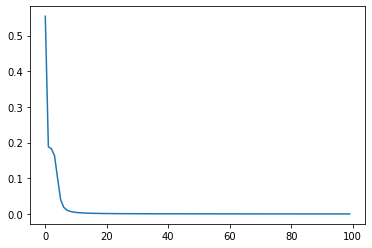

In [40]:

import matplotlib.pyplot as plt 
plt.plot(ds)

### nn 모델을 사용

위의 방법과 달리 nn모델을 사용하면 위의 복잡한 웨이트 초기화와 계산과정은 다 자동화된다. 단지 다음과 같이 모델을 구성할때 2개의 층만 더 추가해주면 된다. 
```
model = nn.Sequential(
     nn.Linear(2,2),
     nn.Sigmoid(),
     nn.Linear(2,1),
     nn.Sigmoid()
)

```
이를 이용한 웨이트와 바이어스 생성, 출력 계산등은 다 자동화 되므로 사실상 이 부분을 제외하면 나머지는 단층 신경망과 동일하다.


In [41]:
model = nn.Sequential(
     nn.Linear(2,2),
     nn.Sigmoid(),
     nn.Linear(2,1),
     nn.Sigmoid()
)
 

optimizer = optim.SGD(model.parameters(), lr = 1)
 
ds = []
for step in range(10000):
  o = model(x)

  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 


  if step % 100 == 0 :
    ds += [d.item()]
    print("err:", d.item())


print( np.round(o.detach().numpy(), 3) )




err: 0.23133650422096252
err: 0.18474705517292023
err: 0.1600351631641388
err: 0.08928703516721725
err: 0.035513363778591156
err: 0.01723921298980713
err: 0.010383711196482182
err: 0.007143838331103325
err: 0.005337722599506378
err: 0.004212041851133108
err: 0.00345340883359313
err: 0.0029121236875653267
err: 0.0025088407564908266
err: 0.0021980542223900557
err: 0.0019519811030477285
err: 0.0017527996096760035
err: 0.0015885699540376663
err: 0.0014510449254885316
err: 0.0013343468308448792
err: 0.0012341816909611225
err: 0.0011473349295556545
err: 0.0010713792871683836
err: 0.0010044267401099205
err: 0.0009449958452023566
err: 0.0008919127285480499
err: 0.0008442343678325415
err: 0.0008011882891878486
err: 0.0007621433469466865
err: 0.0007265765452757478
err: 0.0006940538878552616
err: 0.0006642058724537492
err: 0.0006367211462929845
err: 0.0006113343988545239
err: 0.0005878207739442587
err: 0.0005659820162691176
err: 0.0005456483922898769
err: 0.0005266708321869373
err: 0.000508924655

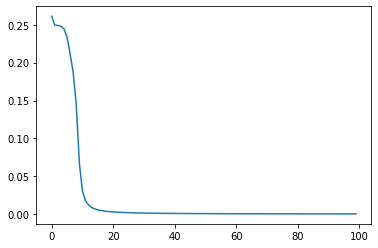

In [ ]:

import matplotlib.pyplot as plt 
plt.plot(ds)

err: 0.24799740314483643
err: 0.20588742196559906
err: 0.09973090142011642
err: 0.043658945709466934
err: 0.022800961509346962
err: 0.013953443616628647
err: 0.00955567043274641
err: 0.007064944598823786
err: 0.005510123912245035
err: 0.0044668265618383884
err: 0.0037274223286658525
err: 0.003180712228640914
err: 0.0027626436203718185
err: 0.0024341170210391283
err: 0.002170098014175892
err: 0.001953904516994953
err: 0.0017740271287038922
err: 0.001622313167899847
err: 0.001492828130722046
err: 0.0013811703538522124
err: 0.0012840046547353268
err: 0.0011987605830654502
err: 0.0011234362609684467
err: 0.001056442386470735
err: 0.0009965095669031143
err: 0.0009426077012903988
err: 0.0008938945247791708
err: 0.0008496736991219223
err: 0.0008093698997981846
err: 0.0007725003524683416
err: 0.0007386502693407238
err: 0.0007074768655002117
err: 0.0006786819430999458
err: 0.0006520099123008549
err: 0.0006272405153140426
err: 0.0006041809683665633
err: 0.0005826668348163366
err: 0.0005625499761

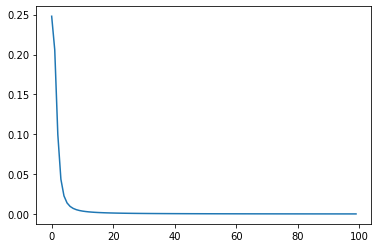

In [44]:
x = tc.FloatTensor([[0,0,1],[1,0,1],[1,0,0],[1,1,1],[1,1,0],[0,0,0]])
y = tc.FloatTensor([[0],[1],[1],[1],[0],[0]])

model = nn.Sequential(
     nn.Linear(3,2),
     nn.Sigmoid(),
     nn.Linear(2,1),
     nn.Sigmoid()
)
 

optimizer = optim.SGD(model.parameters(), lr = 1)
 
ds = []
for step in range(10000):
  o = model(x)

  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 


  if step % 100 == 0 :
    ds += [d.item()]
    print("err:", d.item())


print( np.round(o.detach().numpy(), 3) )


import matplotlib.pyplot as plt 
plt.plot(ds)